<a href="https://colab.research.google.com/github/jacksonn455/Trabalho2IA/blob/master/dataset_carros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Artigos de pesquisa: https://inferir.com.br/artigos/algoritimo-knn-para-classificacao/ e
https://minerandodados.com.br/python-para-analise-de-dados/ e https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn e https://www.kaggle.com/adityapatil673/classification-traits-of-a-poisonous-mushroom/notebook

Algoritimo utilizando **KNN** para classificação do dataset Avaliação de carros


In [ ]:
import csv
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

import scipy as scp
import warnings
warnings.filterwarnings("ignore")

# Ultilizando a biblioteca pandas para importação dos dados
carros = pd.read_csv ('dataset-carros.csv')

# Verificando dados iniciais do dataset importado
carros.head()

,valorcompra,valormanutencao,portas,pessoas,portamalas,nivelseguranca,classes
0,altissimo,altissimo,2,2,pequeno,baixo,inaceitavel
1,altissimo,altissimo,2,2,pequeno,medio,inaceitavel
2,altissimo,altissimo,2,2,pequeno,alto,inaceitavel
3,altissimo,altissimo,2,2,medio,baixo,inaceitavel
4,altissimo,altissimo,2,2,medio,medio,inaceitavel


In [ ]:
# Entendendo o dataset, colunas, data types, quantidade de registros por coluna
carros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   valorcompra      1727 non-null   object
 1   valormanutencao  1727 non-null   object
 2   portas           1727 non-null   int64 
 3   pessoas          1727 non-null   object
 4   portamalas       1727 non-null   object
 5   nivelseguranca   1727 non-null   object
 6   classes          1727 non-null   object
dtypes: int64(1), object(6)
memory usage: 94.6+ KB


In [ ]:
# Quantas linhas tem a base de dados
carros.count()

valorcompra        1727
valormanutencao    1727
portas             1727
pessoas            1727
portamalas         1727
nivelseguranca     1727
classes            1727
dtype: int64

In [ ]:
# imprimir todas colunas do dataset
carros.columns

Index(['valorcompra', 'valormanutencao', 'portas', 'pessoas', 'portamalas',
       'nivelseguranca', 'classes'],
      dtype='object')

In [ ]:
# Verificando detalhes estatísticos do dataset
carros.describe() 

,portas
count,1727.000000
mean,3.499131
std,1.118098
min,2.000000
25%,2.500000
50%,3.000000
75%,4.000000
max,5.000000


In [ ]:
# Verifica valores duplicados por linha, ou seja, verifica se alguma linha é exatamente igual a uma anterior
print(carros.duplicated)


<bound method DataFrame.duplicated of      valorcompra valormanutencao  portas  ... portamalas nivelseguranca      classes
0      altissimo       altissimo       2  ...    pequeno          baixo  inaceitavel
1      altissimo       altissimo       2  ...    pequeno          medio  inaceitavel
2      altissimo       altissimo       2  ...    pequeno           alto  inaceitavel
3      altissimo       altissimo       2  ...      medio          baixo  inaceitavel
4      altissimo       altissimo       2  ...      medio          medio  inaceitavel
...          ...             ...     ...  ...        ...            ...          ...
1722       baixo           baixo       5  ...      medio          medio          bom
1723       baixo           baixo       5  ...      medio           alto        otimo
1724       baixo           baixo       5  ...     grande          baixo  inaceitavel
1725       baixo           baixo       5  ...     grande          medio          bom
1726       baixo           

In [ ]:
# Verificação de valores faltantes
carros.isnull()

,valorcompra,valormanutencao,portas,pessoas,portamalas,nivelseguranca,classes
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1722,False,False,False,False,False,False,False
1723,False,False,False,False,False,False,False
1724,False,False,False,False,False,False,False
1725,False,False,False,False,False,False,False


In [ ]:
# Carros com o melhor Custo beneficio
carros.loc[(carros['valorcompra']=='baixo') & (carros['valormanutencao'] == 'baixo') & (carros['portas'] == 4) & (carros['portamalas'] == 'grande') & (carros['nivelseguranca'] == 'alto') & (carros['classes'] == 'otimo') ]



,valorcompra,valormanutencao,portas,pessoas,portamalas,nivelseguranca,classes
1690,baixo,baixo,4,4,grande,alto,otimo
1699,baixo,baixo,4,5mais,grande,alto,otimo


In [ ]:
# Contar a quantidade de carros com melhor custo e beneficio
carros.loc[(carros['valorcompra']=='baixo') & (carros['valormanutencao'] == 'baixo') & (carros['portas'] == 4) & (carros['portamalas'] == 'grande') & (carros['nivelseguranca'] == 'alto') & (carros['classes'] == 'otimo') ].count()

valorcompra        2
valormanutencao    2
portas             2
pessoas            2
portamalas         2
nivelseguranca     2
classes            2
dtype: int64

In [ ]:
# Obter a forma atual da matriz
carros.shape

(1727, 7)

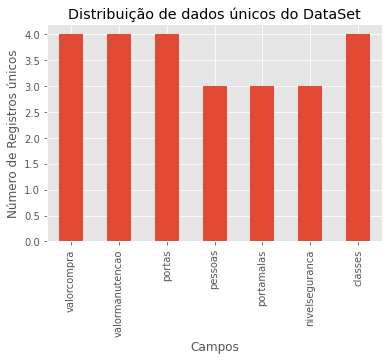

In [ ]:
def grafico (data):
    '''
    Esta função exibirá a quantidade de registros únicos para cada coluna
    existente no dataset
    
    dataframe -> Histogram
    '''
    # Calculando valores unicos para cada label: num_unique_labels
    num_unique_labels = data.apply(pd.Series.nunique)

    # plotando valores
    num_unique_labels.plot( kind='bar')
    
    # Nomeando os eixos
    plt.xlabel('Campos')
    plt.ylabel('Número de Registros únicos')
    plt.title('Distribuição de dados únicos do DataSet')
    
    # Exibindo gráfico
    plt.style.use('ggplot')
    plt.show()

grafico(carros)

Inaceitavel:  1210
Aceitavel:  383
Bom:  69
Otimo:  65


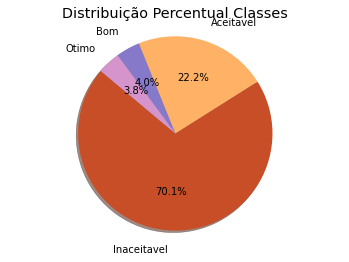

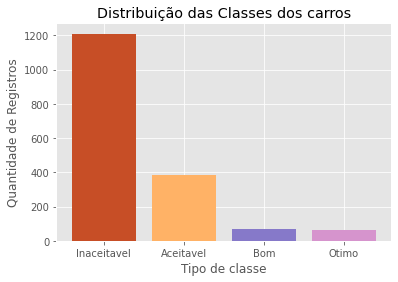

In [ ]:
a = pd.value_counts(carros['classes']) [0]
b = pd.value_counts(carros['classes']) [1]
c = pd.value_counts(carros['classes']) [2]
d = pd.value_counts(carros['classes']) [3]

tam = len(carros)

print('Inaceitavel: ',a)
print('Aceitavel: ',b)
print('Bom: ',c)
print('Otimo: ',d)

pie = pd.DataFrame([['Inaceitavel',a],['Aceitavel',b],['Bom',c],['Otimo',d]],columns=['Tipo' , 'Quantidade'])

def pie_chart(data,col1,col2,col3,col4,title): 
    labels = {'Inaceitavel':'0','Aceitavel':'1', 'Bom':'2', 'Otimo':'3'}
    sizes = data[col4]
    colors = ['#c74e26', '#ffb266', '#8679c9', '#d694cd']


    plt.pie(sizes, labels=labels, colors=colors,
                autopct='%1.1f%%', shadow=True, startangle=140, labeldistance =1.2)
    plt.title( title )
    
    plt.axis('equal')
    plt.show()

pie_chart(pie,'Tipo' ,'label', 'label', 'Quantidade','Distribuição Percentual Classes')


plt.bar(pie.Tipo,pie.Quantidade, color = ['#c74e26', '#ffb266', '#8679c9', '#d694cd'])
plt.title("Distribuição das Classes dos carros")
plt.xlabel("Tipo de classe")
plt.ylabel('Quantidade de Registros')
plt.show()

# Código Exemplo de Classificação usando KNN encontrado no Classroom no dia 09 de Junho

In [ ]:
df_treino=carros.sample(frac=0.8)
df_teste=carros.drop(df_treino.index)

treino = df_treino.to_numpy()
teste = df_teste.to_numpy()

kvizinhos = KNeighborsClassifier(n_neighbors=3)
kvizinhos.fit(treino[:, : -1], treino[:, -1])
resultado = kvizinhos.predict(teste[:, :-1])

erros = 0

for index in range(len(resultado)):
  elemento = teste[index]
  classe = resultado[index]
  print('Elemento %s foi classificado como %s' % (elemento, classe))

  if classe != elemento[-1]:
    erros += 1

print('Número de erros:', erros)


y_previsao = kvizinhos.predict_proba(teste[:, :-1])

acuracia = (len(resultado) - erros) / len(resultado)
print('Acurácia:', acuracia)

ValueError: ignored